In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Cancer_Data.csv')

In [78]:
df = df.drop(['id', 'Unnamed: 32'], axis = 1)

In [79]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)

In [80]:
X = df.drop("diagnosis",axis=1)
y = df["diagnosis"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify = y)

In [81]:
model_dict = {}

In [82]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
rf = RandomForestClassifier()
kf = KFold(n_splits=11)

for train, test in kf.split(X, y):
    rf.fit(X.iloc[train, :], y[train])
    y_pred = rf.predict(X.iloc[test, :])
    print(accuracy_score(y[test], y_pred) * 100)

90.38461538461539
92.3076923076923
90.38461538461539
96.15384615384616
98.07692307692307
96.15384615384616
98.07692307692307
94.23076923076923
100.0
96.07843137254902
96.07843137254902


In [83]:
train, test = list(kf.split(X, y))[8]
X_train, y_train = X.iloc[train, :], y[train]
X_test , y_test = X.iloc[test, : ] , y[test]
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [84]:
ypred = rf.predict(X_test)
print("Accuracy_Score : ",accuracy_score(y_test,ypred)*100)
print("Precision_Score : ",precision_score(y_test,ypred)*100)
print("Recall_Score : ",recall_score(y_test,ypred))

Accuracy_Score :  100.0
Precision_Score :  100.0
Recall_Score :  1.0


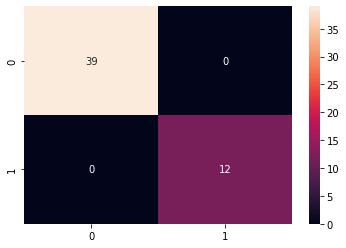

In [85]:
import seaborn as sns
cm = confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [86]:
import random
from xgboost import XGBClassifier, plot_tree
from datetime import datetime
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve, accuracy_score
import importlib

In [87]:
classifier = XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = classifier.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
model_dict['xgboost_classifier'] = accuracy_xgb
print(accuracy_xgb)

1.0
